In [35]:
import pandas as pd
import numpy as np

In [36]:
data =pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [37]:
data.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [38]:
data.duplicated().sum()

np.int64(33)

In [39]:
data = data.drop_duplicates()


In [40]:
data.duplicated().sum()

np.int64(0)

In [41]:
X=data.drop('Purchased',axis=1)
y=data['Purchased']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
print(x_train)

     Age  EstimatedSalary
370   60            46000
213   35            58000
78    28            87000
88    26            81000
385   56            60000
..   ...              ...
73    33           113000
111   37            71000
288   41            79000
377   42            53000
107   27            89000

[293 rows x 2 columns]


In [44]:
print(x_test)

     Age  EstimatedSalary
204   58           101000
34    27            90000
15    29            80000
334   57            60000
59    32           117000
..   ...              ...
85    31           118000
99    28            37000
203   41            71000
379   58            23000
222   37           144000

[74 rows x 2 columns]


In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
print(x_train)

[[ 2.11441371e+00 -7.12832517e-01]
 [-2.40829664e-01 -3.69830036e-01]
 [-9.00297808e-01  4.59092627e-01]
 [-1.08871728e+00  2.87591386e-01]
 [ 1.73757477e+00 -3.12662956e-01]
 [ 8.89687155e-01 -1.31308686e+00]
 [-1.46555622e+00 -2.26912335e-01]
 [ 1.07810662e+00  5.16259707e-01]
 [-5.23458868e-01  2.25985565e+00]
 [ 2.30219011e-01 -3.41246496e-01]
 [-5.24101938e-02  3.03395255e-02]
 [ 4.17995411e-02  1.20226467e+00]
 [ 8.89687155e-01  9.73596349e-01]
 [ 4.17995411e-02  1.75598540e-03]
 [ 9.83896890e-01  1.71676839e+00]
 [ 2.30219011e-01 -3.98413576e-01]
 [-5.24101938e-02  1.73257226e-01]
 [-1.37134648e+00 -1.41161715e-01]
 [-5.24101938e-02 -1.08441854e+00]
 [ 2.02020397e+00  4.87676167e-01]
 [-7.11878338e-01  1.03076343e+00]
 [ 4.17995411e-02  1.17368113e+00]
 [-9.94507543e-01  7.16344488e-01]
 [ 7.01267685e-01 -1.28450332e+00]
 [-6.17668603e-01 -1.59892226e+00]
 [ 8.89687155e-01 -1.45600456e+00]
 [ 7.95477420e-01 -1.39883748e+00]
 [ 1.45494556e+00  3.03395255e-02]
 [ 9.83896890e-01 -1

In [47]:
print(x_test)

[[ 1.92599424e+00  8.59262188e-01]
 [-9.94507543e-01  5.44843247e-01]
 [-8.06088073e-01  2.59007846e-01]
 [ 1.83178450e+00 -3.12662956e-01]
 [-5.23458868e-01  1.31659883e+00]
 [-1.74818542e+00 -1.28450332e+00]
 [-1.08871728e+00 -1.54175518e+00]
 [ 3.24428746e-01 -5.69914817e-01]
 [-5.23458868e-01  1.83110255e+00]
 [-4.29249133e-01 -1.14158562e+00]
 [ 7.95477420e-01  4.87676167e-01]
 [-9.94507543e-01 -1.54175518e+00]
 [ 4.18638481e-01  5.44843247e-01]
 [-9.00297808e-01  2.30424306e-01]
 [-7.11878338e-01  5.16259707e-01]
 [ 9.83896890e-01 -1.17016916e+00]
 [-1.74818542e+00 -1.48458810e+00]
 [ 1.17231636e+00 -9.98667918e-01]
 [ 1.54915530e+00 -2.68275547e-02]
 [-1.08871728e+00 -1.02725146e+00]
 [-2.40829664e-01 -1.69745255e-01]
 [-1.08871728e+00  1.34518237e+00]
 [-3.35039398e-01  1.17368113e+00]
 [ 2.02020397e+00  1.44673686e-01]
 [ 4.18638481e-01  1.05934697e+00]
 [ 1.64336503e+00  1.68818485e+00]
 [ 2.30219011e-01  1.03076343e+00]
 [ 7.95477420e-01  8.75066057e-02]
 [ 4.18638481e-01 -1

In [79]:
'''from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions
    '''

In [88]:
#model1=KNN(5)
#model1.fit(x_train, y_train)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=5,metric = 'euclidean')
model2.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [90]:
#y_predict_model1=model1.predict(x_test)
y_predict_model2=model2.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score ,confusion_matrix
cm=confusion_matrix(y_test,y_predict_model2)
print(cm)
print(accuracy_score(y_test,y_predict_model2))

[[42  4]
 [ 7 21]]
0.8513513513513513


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipython-input-2649103465.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


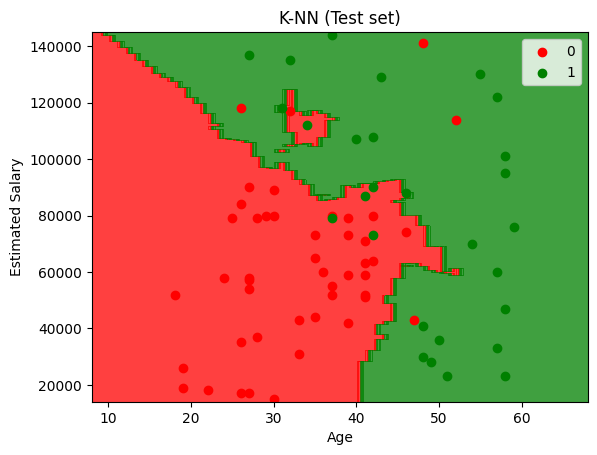

In [92]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()